In [4]:
%load_ext autoreload
%autoreload 2

(480, 640)
uint8


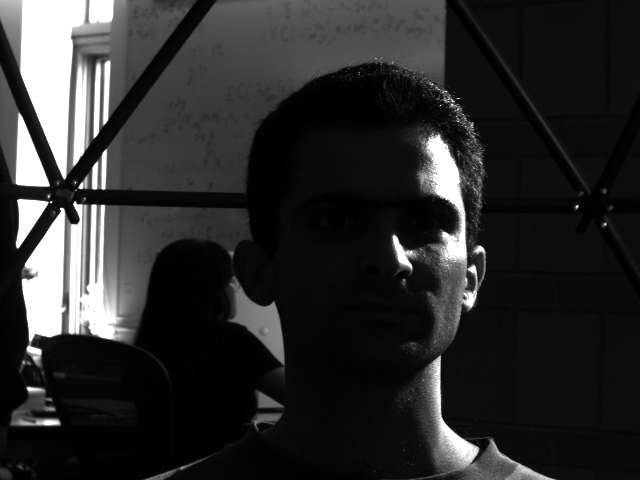

In [51]:
import glob
g = glob.glob('ExtendedYaleB/*/*.pgm')
from PIL import Image
import numpy as np
im = Image.open('ExtendedYaleB/yaleB11/yaleB11_P02A-130E+20.pgm')
arr = np.array(im)
print(arr.shape)
print(arr.dtype)
display(im)

In [46]:
import bz2
import glob
import os
import os.path as osp
from pathlib import Path
import sys
from multiprocessing import Pool

import dlib
import numpy as np
import PIL.Image
import requests
import scipy.ndimage
from tqdm import tqdm
from argparse import ArgumentParser

from align import *

LANDMARKS_MODEL_URL = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'


# takes very long time  ...
landmarks_model_path = unpack_bz2(
    get_file(
        'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2',
        'temp/shape_predictor_68_face_landmarks.dat.bz2'))

files = glob.glob('ExtendedYaleB/*/*.pgm')
ALIGNED_IMAGES_DIR = Path("aligned_ExtendedYaleB/")

if not osp.exists(ALIGNED_IMAGES_DIR): os.makedirs(ALIGNED_IMAGES_DIR)

print(f'total img files {len(files)}')
# with tqdm(total=len(files)) as progress:

def cb(*args):
    # print('update')
    progress.update()

def err_cb(e):
    print('error:', e)

with Pool(8) as pool:
    res = []
    landmarks_detector = LandmarksDetector(landmarks_model_path)
    for img_name in tqdm(files):
        raw_img_path = img_name
        output_path = ALIGNED_IMAGES_DIR / Path(raw_img_path).parent.relative_to('ExtendedYaleB')
        output_path.mkdir(exist_ok=True)
        # print('img_name:', img_name)
        for i, face_landmarks in enumerate(
                landmarks_detector.get_landmarks(raw_img_path),
                start=1):
            # assert i == 1, f'{i}'
            # print(i, face_landmarks)
            # face_img_name = '%s_%02d.png' % (os.path.splitext(img_name)[0], i)
            # aligned_face_path = os.path.join(ALIGNED_IMAGES_DIR, face_img_name)
            # image_align(raw_img_path, aligned_face_path, face_landmarks, output_size=256)
            work_landmark(raw_img_path, img_name, face_landmarks, output_path)
#             progress.update()

            # job = pool.apply_async(
            #     work_landmark,
            #     (raw_img_path, img_name, face_landmarks),
            #     callback=cb,
            #     error_callback=err_cb,
            # )
            # res.append(job)

    # pool.close()
    # pool.join()
print(f"output aligned images at: {ALIGNED_IMAGES_DIR}")

cached
cached
total img files 585


100%|█████████████████████████████████████████████████████████████████████████████████| 585/585 [05:50<00:00,  1.67it/s]

output aligned images at: aligned_ExtendedYaleB


In [47]:
from pathlib import Path

files = glob.glob(f'ExtendedYaleB/yaleB16/*.pgm')
files2 = glob.glob(f'aligned_ExtendedYaleB/yaleB16/*.png')
for f in files2:
    p = Path(f)
    new_stem = p.stem[:10] + str(int(p.stem[10]) - 1) + p.stem[11:]
    p.rename(Path(p.parent, f"{new_stem}{p.suffix}"))

In [55]:
poses = ["P00A","P01A","P02A","P03A","P04A","P05A","P06A","P07A","P08A"]
illuminations = [
    "+000E+00",
"+000E+20",
"+000E+45",
"+000E+90",
"+000E-20",
"+000E-35",
"+005E+10",
"+005E-10",
"+010E+00",
"+010E-20",
"+015E+20",
"+020E+10",
"+020E-10",
"+020E-40",
"+025E+00",
"+035E+15",
"+035E+40",
"+035E+65",
"+035E-20",
"+050E+00",
"+050E-40",
"+060E+20",
"+060E-20",
"+070E+00",
"+070E+45",
"+070E-35",
"+085E+20",
"+085E-20",
"+095E+00",
"+110E+15",
"+110E+40",
"+110E+65",
"+110E-20",
"+120E+00",
"+130E+20",
"-005E+10",
"-005E-10",
"-010E+00",
"-010E-20",
"-015E+20",
"-020E+10",
"-020E-10",
"-020E-40",
"-025E+00",
"-035E+15",
"-035E+40",
"-035E+65",
"-035E-20",
"-050E+00",
"-050E-40",
"-060E+20",
"-060E-20",
"-070E+00",
"-070E+45",
"-070E-35",
"-085E+20",
"-085E-20",
"-095E+00",
"-110E+15",
"-110E+40",
"-110E+65",
"-110E-20",
"-120E+00",
"-130E+20",
]
top_i = []
for i in illuminations:
    l1 = 0
    l2 = 0
    for j in poses:
        files = glob.glob(f'ExtendedYaleB/*/*{j}{i}.pgm')
        files2 = glob.glob(f'aligned_ExtendedYaleB/*/*{j}{i}.png')
        l1 += len(files)
        l2 += len(files2)
#         print(j, i, len(files), len(files2))
    print(i, l1, l2)
    if l2 > 236:
        top_i.append(i)
print(top_i)

+000E+00 251 247
+000E+20 251 249
+000E+45 251 246
+000E+90 251 36
+000E-20 251 247
+000E-35 251 223
+005E+10 251 248
+005E-10 251 249
+010E+00 251 248
+010E-20 251 247
+015E+20 251 248
+020E+10 251 247
+020E-10 251 248
+020E-40 251 205
+025E+00 251 246
+035E+15 251 247
+035E+40 251 245
+035E+65 251 191
+035E-20 251 238
+050E+00 251 224
+050E-40 251 136
+060E+20 251 237
+060E-20 251 115
+070E+00 251 54
+070E+45 251 176
+070E-35 251 87
+085E+20 251 67
+085E-20 251 15
+095E+00 251 8
+110E+15 251 7
+110E+40 251 12
+110E+65 251 28
+110E-20 251 29
+120E+00 251 14
+130E+20 251 17
-005E+10 251 246
-005E-10 251 248
-010E+00 251 232
-010E-20 251 246
-015E+20 251 248
-020E+10 251 248
-020E-10 251 246
-020E-40 251 195
-025E+00 251 247
-035E+15 251 249
-035E+40 251 239
-035E+65 251 146
-035E-20 251 223
-050E+00 251 219
-050E-40 251 62
-060E+20 251 214
-060E-20 251 45
-070E+00 251 5
-070E+45 251 161
-070E-35 251 13
-085E+20 251 10
-085E-20 251 1
-095E+00 251 2
-110E+15 251 1
-110E+40 251 1
-110E+65

In [57]:
for i in top_i:
    for j in poses:
        files = glob.glob(f'ExtendedYaleB/*/*{j}{i}.pgm')
        files2 = glob.glob(f'aligned_ExtendedYaleB/*/*{j}{i}.png')
        if len(files2) < 26:
            print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa")
        print(j, i, len(files), len(files2))

P00A +000E+00 27 28
P01A +000E+00 28 28
P02A +000E+00 28 27
P03A +000E+00 28 28
P04A +000E+00 28 28
P05A +000E+00 28 27
P06A +000E+00 28 26
P07A +000E+00 28 28
P08A +000E+00 28 27
P00A +000E+20 27 28
P01A +000E+20 28 27
P02A +000E+20 28 28
P03A +000E+20 28 28
P04A +000E+20 28 28
P05A +000E+20 28 27
P06A +000E+20 28 28
P07A +000E+20 28 27
P08A +000E+20 28 28
P00A +000E+45 27 28
P01A +000E+45 28 27
P02A +000E+45 28 27
P03A +000E+45 28 28
P04A +000E+45 28 27
P05A +000E+45 28 26
P06A +000E+45 28 28
P07A +000E+45 28 28
P08A +000E+45 28 27
P00A +000E-20 27 28
P01A +000E-20 28 28
P02A +000E-20 28 27
P03A +000E-20 28 28
P04A +000E-20 28 27
P05A +000E-20 28 28
P06A +000E-20 28 26
P07A +000E-20 28 27
P08A +000E-20 28 28
P00A +005E+10 27 28
P01A +005E+10 28 28
P02A +005E+10 28 27
P03A +005E+10 28 27
P04A +005E+10 28 28
P05A +005E+10 28 28
P06A +005E+10 28 27
P07A +005E+10 28 27
P08A +005E+10 28 28
P00A +005E-10 27 28
P01A +005E-10 28 27
P02A +005E-10 28 28
P03A +005E-10 28 28
P04A +005E-10 28 28


In [62]:
import torch
from torchvision import transforms
N = 6154
x = torch.empty((N, 3, 128, 128))
y = torch.empty((N), dtype=torch.int)
cf = torch.empty((N), dtype=torch.int)
img_idx = 0
resize = transforms.Resize(128)
convert_tensor = transforms.ToTensor()
for i, illum in enumerate(top_i):
    for j, pose in enumerate(poses):
        files = glob.glob(f'aligned_ExtendedYaleB/*/*{pose}{illum}.png')
        for k, file in enumerate(files):
            
            x[img_idx] = convert_tensor(resize(Image.open(file)))
            y[img_idx] = j
            cf[img_idx] = i
            img_idx += 1
assert(img_idx == N)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, cf_train, cf_test = train_test_split(x, y, cf,
                                                                       stratify=y * 100 + cf,
                                                                       test_size=0.20)

X_train, X_val, y_train, y_val, cf_train, cf_val = train_test_split(X_train, y_train, cf_train,
                                                                    stratify=y_train * 100 + cf_train,
                                                                    test_size=0.20)

In [67]:
torch.save(X_train, "yale/X_train.pt")
torch.save(X_val, "yale/X_val.pt")
torch.save(X_test, "yale/X_test.pt")
torch.save(y_train, "yale/y_train.pt")
torch.save(y_val, "yale/y_val.pt")
torch.save(y_test, "yale/y_test.pt")
torch.save(cf_train, "yale/cf_train.pt")
torch.save(cf_val, "yale/cf_val.pt")
torch.save(cf_test, "yale/cf_test.pt")

In [71]:
cf_train.shape

torch.Size([3938])